# 미션2: 관련 없는 Data 삭제

In [ ]:
# 사용 module import
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
import os
from PIL import Image
from tqdm.notebook import tqdm

## Data 불러오기

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/2022DataCreatorCamp/dataset

/content/drive/MyDrive/2022DataCreatorCamp/dataset


In [ ]:
ls

'대학부 데이터셋.zip'


### 폴더 내 데이터 검색(ls) 결과에 압축 폴더가 없을 경우 아래 셀 실행x

In [ ]:
!unzip '대학부 데이터셋.zip'
!rm -rf '대학부 데이터셋.zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: L2_41/yxtxwawodpbozadexchs.jpg  
  inflating: L2_41/pnfztlmerrrkqmeqqmme.jpg  
  inflating: L2_41/nargedsqusnkzkfwxkje.jpg  
  inflating: L2_41/szfqmropzcaevghrilke.jpg  
  inflating: L2_41/dmqdwsedrcydkmniydlw.png  
  inflating: L2_41/jhfbjiefvhimqhblihgj.jpg  
  inflating: L2_41/erqrzkapkbjskpdgmgeh.jpg  
  inflating: L2_41/issjlcvsyadjelkqdych.jpg  
  inflating: L2_41/lhmtveghjnczgguytlqx.jpg  
  inflating: L2_41/dzoinzzrxkktpyjgazmr.jpg  
  inflating: L2_41/psjensoqzdgrmwwnmaop.jpg  
  inflating: L2_41/akwgwqeazpoirdpdiplp.jpg  
  inflating: L2_41/rgtvdtvohahvrtidkxps.jpg  
  inflating: L2_41/nocnjcllyvpopxvpbqer.jpg  
  inflating: L2_41/obwtgqsnstfogxrmlsca.jpg  
  inflating: L2_41/cbvovkwrqylgmezmamul.jpg  
  inflating: L2_41/vvyepihfifiskyaqyzqy.jpg  
  inflating: L2_41/lorobaasojdhjxztszez.jpg  
  inflating: L2_41/zoxytlgfkachqggmzqps.jpg  
  inflating: L2_41/qhvwlqedegadcbuayica.jpg  
  inflating: L2_41/qozsgcdqngvezpvgnwur.jpg 

## 문제점 도출

In [ ]:
# main 경로 변수 저장
main_folder_path = '/content/drive/MyDrive/2022DataCreatorCamp/dataset'

# 경로 내 class 목록 추출
folder_list = os.listdir('/content/drive/MyDrive/2022DataCreatorCamp/dataset')
folder_list

['L2_10',
 'L2_12',
 'L2_15',
 'L2_20',
 'L2_21',
 'L2_24',
 'L2_25',
 'L2_27',
 'L2_3',
 'L2_30',
 'L2_33',
 'L2_34',
 'L2_39',
 'L2_40',
 'L2_41',
 'L2_44',
 'L2_45',
 'L2_46',
 'L2_50',
 'L2_52']

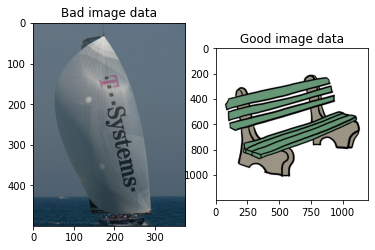

In [ ]:
# 문제점: 학습과 관련 없는 data 존재
fig = plt.figure()

img1_path = main_folder_path+'/'+folder_list[8]+'/'+os.listdir(main_folder_path+'/'+folder_list[8])[357]
img1 = Image.open(img1_path)
img2_path = main_folder_path+'/'+folder_list[8]+'/'+os.listdir(main_folder_path+'/'+folder_list[8])[10]
img2 = Image.open(img2_path)

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax1.set_title("Bad image data")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2)
ax2.set_title("Good image data")

plt.show()

##관련 없는 data 삭제

In [ ]:
# image data의 hue_lightness pair 분포 및 픽셀 포함 비율 계산 함수
def image_distribution(img_path,
                       plot = False,
                       img_show = False,
                       max_intensity = 1000000,
                       print_threshold_diagnostics = False,
                       color_width = 1000,
                       return_proportion = False):
  # 함수에서 사용할 모듈 import
  import numpy as np
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  import colorsys
  from PIL import Image

  # data load 및 data size 저장
  img_file = Image.open(img_path).convert('RGB')
  img_file = img_file.resize((200,200))
  img = img_file.load()
  [xs,ys] = img_file.size
  max_intensity = max_intensity
  hues = {}

  # image data의 각 pixel의 정보 저장
  for x in range(0, xs):
    for y in range(0, ys):
      # pixel의 RGB 정보 저장
      [r, g, b] = img[x, y]
      # pixel RGB값 정규화
      r /= 255.0
      g /= 255.0
      b /= 255.0
      # RGB > HSL로 값 변환
      [h, l, s] = colorsys.rgb_to_hls(r, g, b)
      # 색상-채도 쌍 counting
      if h not in hues:
        hues[h] = {}
      if l not in hues[h]:
        hues[h][l] = 1
      else:
        if hues[h][l] < max_intensity:
          hues[h][l] += 1

  # 색상 > 1차원 배열
  h_ = []
  l_ = []
  i = []
  colours = []

  for h in hues:
    for l in hues[h]:
      h_.append(h) # 색상 리스트 추가
      l_.append(l) # 채도 리스트 추가
      i.append(hues[h][l]) # 색상-채도 쌍 수 리스트 추가
      [r, g, b] = colorsys.hls_to_rgb(h, l, 1) # HSL > RGB 변환
      colours.append([r, g, b]) # HSL값에 대응하는 RGB 값 리스트 추가

  # 그래프 표시 선택 시
  raw_image = Image.open(img_path)
  raw_image = np.asarray(raw_image)
  if plot==True:
    fig = plt.figure(figsize=(12,5))
    fig.set_facecolor("white")
    ax = plt.subplot2grid((2,6), (0,0), colspan=4, rowspan=2, projection='3d')
    ax.scatter(h_, l_, i, s=30, c=colours, lw=0.5, edgecolors='black')
    ax.set_xlabel('Hue')
    ax.set_ylabel('Lightness')
    ax.set_zlabel('Population')
    # 원본 이미지 표시 선택 시
    if img_show == True:
      ax2 = plt.subplot2grid((2,6), (0,4), colspan=2, rowspan=2)
      ax2.imshow(raw_image)
    plt.tight_layout()
    plt.show()
  
  # 계산 결과 도출
  n_greatest = sum(sorted(i, reverse=True)[:color_width]) # 가장 많이 나타난 상위 color_width개의 색상-채도 쌍 수 합
  img_size = xs*ys # image data 크기
  if print_threshold_diagnostics == True:
    print(f'There are {len(i)} hue/lightness pairs in this image.') # image data에 나타난 총 색상-채도 쌍 unique 수
    print(f'Population of {color_width} hue/lightness pairs with the largest populations = {n_greatest}') # 상위 color_width개의 색상-채도 쌍이 출현한 횟수(pixel 수)
    print(f'This represents {n_greatest/img_size*100:.2f}% of the total pixels in the image.') # 전체 image에 대해 상위 color_width개의 색상-채도 쌍이 차지하는 비율

  if return_proportion == True:
    return n_greatest/img_size

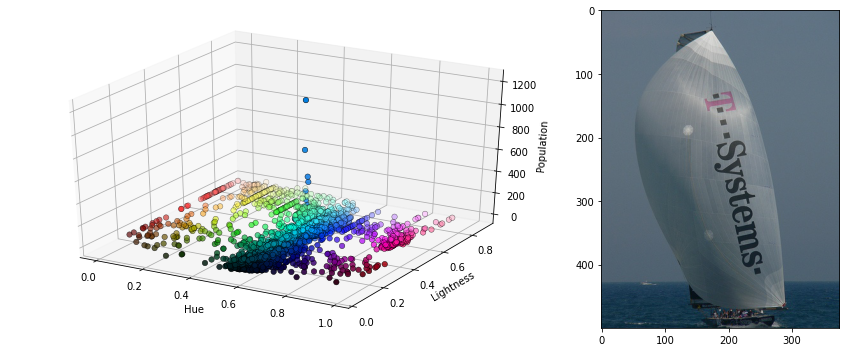

There are 9540 hue/lightness pairs in this image.
Population of 10 hue/lightness pairs with the largest populations = 4844
This represents 12.11% of the total pixels in the image.


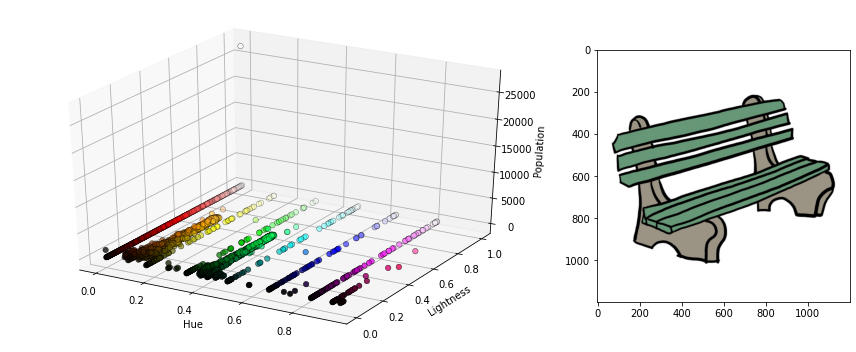

There are 2825 hue/lightness pairs in this image.
Population of 10 hue/lightness pairs with the largest populations = 32160
This represents 80.40% of the total pixels in the image.


In [ ]:
# 실제 사진과 일러스트의 색상-채도 쌍 분포 비교
img1_proportion = image_distribution(img1_path, plot=True, img_show=True, print_threshold_diagnostics=True, return_proportion=True, color_width=10)
img2_proportion = image_distribution(img2_path, plot=True, img_show=True, print_threshold_diagnostics=True, return_proportion=True, color_width=10)

In [ ]:
# 각 class folder 돌아다니면서 색상-채도 쌍 출현 pixcels 비율 계산하기
total_img_proportion = {}
for folder_name in folder_list:
  total_img_proportion[folder_name] = {}
  folder_path = main_folder_path+'/'+folder_name
  file_list = os.listdir(folder_path)
  for file_name in tqdm(file_list):
    file_path = folder_path+'/'+file_name
    img_proportion = image_distribution(file_path,color_width=10,return_proportion=True)
    total_img_proportion[folder_name][file_name] = img_proportion

  0%|          | 0/1893 [00:00<?, ?it/s]

  0%|          | 0/518 [00:00<?, ?it/s]

  0%|          | 0/1509 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


  0%|          | 0/410 [00:00<?, ?it/s]

  0%|          | 0/410 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/6189 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/6206 [00:00<?, ?it/s]

  0%|          | 0/419 [00:00<?, ?it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/593 [00:00<?, ?it/s]

  0%|          | 0/547 [00:00<?, ?it/s]

  0%|          | 0/631 [00:00<?, ?it/s]

  0%|          | 0/2214 [00:00<?, ?it/s]

  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/382 [00:00<?, ?it/s]

In [ ]:
# image data의 색상-채도 쌍 비율 DataFrame생성
class_index_list = []
class_name_list = []
img_index_list = []
img_name_list = []
img_prop_list = []

for cidx, (cls, imgs) in enumerate(total_img_proportion.items()):
  class_index = cidx
  class_name = cls
  for iidx,(iname, prop) in enumerate(total_img_proportion[class_name].items()):
    img_index = iidx
    img_name = iname
    img_prop = prop
    
    class_index_list.append(class_index)
    class_name_list.append(class_name)
    img_index_list.append(img_index)
    img_name_list.append(img_name)
    img_prop_list.append(img_prop)

img_prop_df = pd.DataFrame(zip(class_index_list,class_name_list,img_index_list,img_name_list,img_prop_list))
img_prop_df.columns = ['cindex','class','iindex','image','proportion']

In [ ]:
# 누락 data 확인
print("총 data 수: ",len(img_prop_df))

총 data 수:  25503


In [ ]:
# image 분포 보기 - 통계
pd.DataFrame(img_prop_df['proportion']).describe()

,proportion
count,25503.000000
mean,0.783230
std,0.233674
min,0.001725
25%,0.756175
50%,0.853350
75%,0.920150
max,0.995700


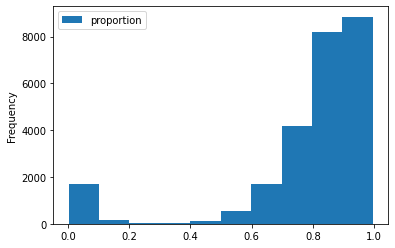

In [ ]:
# image 분포 보기 - histogram
pd.DataFrame(img_prop_df['proportion']).plot(kind='hist')

In [ ]:
"""
image data의 색상-채도 쌍 비율 통계
평균: 약 78%
1사분위수: 약 76%
히스토그램까지 포함하여 의논한 결과 기준을 70%으로,
기준 이상인 data를 학습에 사용할 data로 선정
"""
# 실제 사진 제외한 data(img_prop_df.proportion >= 0.7)
illu_data_df = img_prop_df[img_prop_df.proportion >= 0.7]
print("사용할 data 수: ",len(illu_data_df))

# 삭제할 data (img_prop_df.proportion < 0.7)
to_delete_df = img_prop_df[img_prop_df.proportion < 0.7]
print("제거할 data 수: ",len(to_delete_df))

사용할 data 수:  21133
제거할 data 수:  4370


In [ ]:
# 학습에 필요 없는 data 삭제
for c in tqdm(folder_list):
  folder_name = c
  in_file_list = os.listdir(main_folder_path+'/'+folder_name)
  for i in in_file_list:
    file_name = i
    if (folder_name in list(to_delete_df['class'])) & (file_name in list(to_delete_df['image'])):
      delete_path = main_folder_path+'/'+folder_name+'/'+file_name
      if os.path.exists(delete_path):
        os.remove(delete_path)

  0%|          | 0/20 [00:00<?, ?it/s]

# 미션1: Data EDA

## Labeling

In [ ]:
# image data > tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    ])

In [ ]:
# data class = 존재하는 Folder Name
dataset = datasets.ImageFolder(root='/content/drive/MyDrive/2022DataCreatorCamp/dataset',transform=transform)

In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 21133
    Root location: /content/drive/MyDrive/2022DataCreatorCamp/dataset
    StandardTransform
Transform: Compose(
               ToTensor()
           )

## class별 data 분포 확인

In [ ]:
# 총 Data 크기
print("총 data: ", len(dataset))

총 data:  21133


In [ ]:
# Data Class의 정보
print(dataset.classes)
print("class 수: ", len(dataset.classes))

['L2_10', 'L2_12', 'L2_15', 'L2_20', 'L2_21', 'L2_24', 'L2_25', 'L2_27', 'L2_3', 'L2_30', 'L2_33', 'L2_34', 'L2_39', 'L2_40', 'L2_41', 'L2_44', 'L2_45', 'L2_46', 'L2_50', 'L2_52']
class 수:  20


In [ ]:
# class의 index 확인
dataset.class_to_idx.items()

dict_items([('L2_10', 0), ('L2_12', 1), ('L2_15', 2), ('L2_20', 3), ('L2_21', 4), ('L2_24', 5), ('L2_25', 6), ('L2_27', 7), ('L2_3', 8), ('L2_30', 9), ('L2_33', 10), ('L2_34', 11), ('L2_39', 12), ('L2_40', 13), ('L2_41', 14), ('L2_44', 15), ('L2_45', 16), ('L2_46', 17), ('L2_50', 18), ('L2_52', 19)])

In [ ]:
# class의 data 수 계산
c_list = []
n_list = []

class_data_count = pd.DataFrame()

for f in folder_list:
  img_list = os.listdir(main_folder_path+'/'+f)
  img_num = len(img_list)
  c_list.append(f)
  n_list.append(img_num)

class_data_count['class'] = c_list
class_data_count['count'] = n_list

Text(0.5, 1.0, 'Dataset Distribution')

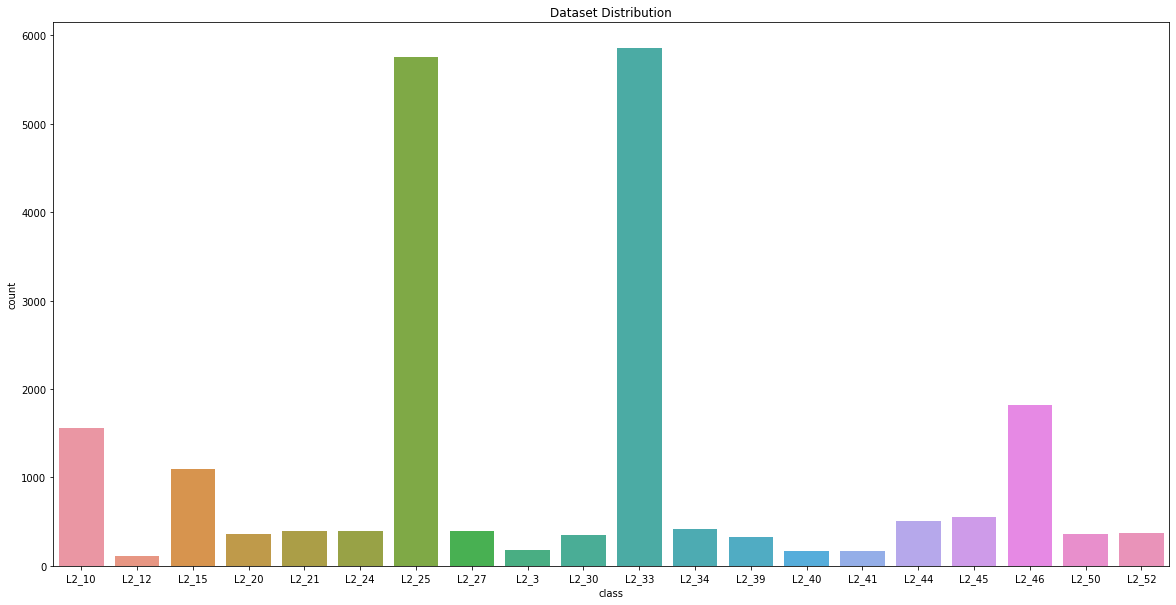

In [ ]:
# data 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 그래프 그리기
plt.figure(figsize=(20,10))
sns.barplot(data = class_data_count, x="class", y="count").set_title("Dataset Distribution")

## Data 분포 문제 해결

# **1-1. 이미지 유사도 측정 및 삭제**

In [ ]:
pip install imagehash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 296 kB 32.3 MB/s 


In [ ]:
import imagehash
from PIL import Image
import numpy as np
import os
import cv2
import pathlib
from os import path
import shutil


def alpharemover(image):
  if image.mode != 'RGBA':
    return image
  canvas = Image.new('RGBA', image.size, (255,255,255,255))
  canvas.paste(image, mask=image)
  return canvas.convert('RGB')

def with_ztransform_preprocess(hashfunc, hash_size=4):
  def function(path):
    image = alpharemover(Image.open(path))
    image = image.convert("L").resize((hash_size, hash_size), Image.ANTIALIAS)
    data = image.getdata()
    quantiles = np.arange(100)
    quantiles_values = np.percentile(data, quantiles)
    zdata = (np.interp(data, quantiles_values, quantiles) / 100 * 255).astype(np.uint8)
    image.putdata(zdata)
    return hashfunc(image)
  return function

hasher = with_ztransform_preprocess(imagehash.dhash, hash_size = 5)


input_folder1 = r"/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_25" 
os.mkdir('./New_L2_25')
output_folder1 = r"/content/drive/MyDrive/2022DataCreatorCamp/dataset/New_L2_25" 

input_folder2 = r"/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_33" 
os.mkdir('./New_L2_33')
output_folder2 = r"/content/drive/MyDrive/2022DataCreatorCamp/dataset/New_L2_33"

def remove_duplicates(hash_algorithm,directory1, directory2):
  image_list = os.listdir(directory1)
  hash_set = set()
  for im_name in image_list:
    image_path = path.join(directory1,im_name)
    image_hash = hash_algorithm(image_path)
    if image_hash not in hash_set:
      hash_set.add(image_hash)
      image = cv2.imread(image_path)
      cv2.imwrite(os.path.join(directory2,im_name),image)


remove_duplicates(hasher,input_folder1, output_folder1)

remove_duplicates(hasher,input_folder2, output_folder2)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
# 파일 속 사진 개수 확인
import pathlib

initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_25").iterdir():
  if path.is_file():
    initial_count +=1

print("L2_25 전: ",initial_count,"\n")

initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/New_L2_25").iterdir():
  if path.is_file():
    initial_count +=1

print("L2_25 후: ",initial_count,"\n")

initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_33").iterdir():
  if path.is_file():
    initial_count +=1

print("L2_33 전: ",initial_count,"\n")

initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/New_L2_33").iterdir():
  if path.is_file():
    initial_count +=1

print("L2_33 후: ",initial_count)

L2_25 전:  5756 

L2_25 후:  5316 

L2_33 전:  5855 

L2_33 후:  5636


In [ ]:
#기존 파일 삭제
shutil.rmtree('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_25')
shutil.rmtree('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_33')
#파일 이름 변경
os.rename('/content/drive/MyDrive/2022DataCreatorCamp/dataset/New_L2_25','/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_25')
os.rename('/content/drive/MyDrive/2022DataCreatorCamp/dataset/New_L2_33','/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_33')

# **1-2. 랜덤 언더샘플링**

In [ ]:
import pathlib
import random

initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_25").iterdir():
  if path.is_file():
    initial_count +=1

path = r'/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_25'
n = initial_count - 1000    
img_names = os.listdir(path)  
img_names = random.sample(img_names, n)  
for image in img_names:  
  f = os.path.join(path, image)  
  os.remove(f)  

initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_33").iterdir():
  if path.is_file():
    initial_count +=1

path = r'/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_33'
n = initial_count - 1000    
img_names = os.listdir(path)  
img_names = random.sample(img_names, n)  
for image in img_names:  
  f = os.path.join(path, image) 
  os.remove(f)  

initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_10").iterdir():
  if path.is_file():
    initial_count +=1

path = r'/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_10'
n = initial_count - 1000   
img_names = os.listdir(path)  
img_names = random.sample(img_names, n) 
for image in img_names:  
  f = os.path.join(path, image)  
  os.remove(f)  


initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_15").iterdir():
  if path.is_file():
    initial_count +=1

path = r'/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_15'
n = initial_count - 1000    
img_names = os.listdir(path)  
img_names = random.sample(img_names, n) 
for image in img_names: 
  f = os.path.join(path, image) 
  os.remove(f)  

initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_46").iterdir():
  if path.is_file():
    initial_count +=1

path = r'/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_46'
n = initial_count - 1000    
img_names = os.listdir(path)  
img_names = random.sample(img_names, n)  
for image in img_names:  
  f = os.path.join(path, image)  
  os.remove(f)  

In [ ]:
# 파일 속 사진 개수 확인
import pathlib

initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_25").iterdir():
  if path.is_file():
    initial_count +=1

print(initial_count)

1000


In [ ]:
initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_33").iterdir():
  if path.is_file():
    initial_count +=1

print(initial_count)

1000


# **1-3. 오버샘플링**

In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    

def oversampl(file_path): 
  initial_count = 0
  for path in pathlib.Path(file_path).iterdir():
    if path.is_file():
      initial_count +=1
      if initial_count < 1000:
        image_num = 1000 - initial_count
      else:
        continue

  file_names = os.listdir(file_path)
  total_origin_image_num = len(file_names)
  augment_cnt = 1

  for i in range(1, image_num):
      change_picture_index = random.randrange(1, total_origin_image_num-1)
      file_name = file_names[change_picture_index]
      
      origin_image_path = file_path + file_name

      image = Image.open(origin_image_path)
      
      random_augment = random.randrange(1,4)
      
      if(random_augment == 1):
          inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
          if inverted_image.mode == "CMYK":
            inverted_image = inverted_image.convert("RGB")
          inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.png')
          
      elif(random_augment == 2):
          rotated_image = image.rotate(random.randrange(-20, 20))
          if rotated_image.mode == "CMYK":
            rotated_image = rotated_image.convert("RGB")
          rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.png')
          
      elif(random_augment == 3):
          img = cv2.imread(origin_image_path)
          row,col,ch= img.shape
          mean = 0
          var = 0.1
          sigma = var**0.5
          gauss = np.random.normal(mean,sigma,(row,col,ch))
          gauss = gauss.reshape(row,col,ch)
          noisy_array = img + gauss
          noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
          noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.png')
          
      augment_cnt += 1

#oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_12/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_20/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_21/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_24/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_27/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_3/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_30/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_34/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_39/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_40/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_41/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_44/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_45/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_50/')
oversampl('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_52/')

UnidentifiedImageError: ignored

In [ ]:
len(os.listdir('/content/drive/MyDrive/2022DataCreatorCamp/dataset/L2_20/'))

768

# 미션3: 분류기 생성

파라미터 정의
batch_size = 100
learning_rate = 0.0002
num_epoch = 10

In [ ]:
import torch
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import os
import shutil

In [ ]:
# 경로 설정
base_dir = '/drive/MyDrive/2022DataCreatorCamp/dataset'

In [ ]:
# 원래 이미지 리스트 뽑아놓기
L2_10 = os.listdir(os.path.join(base_dir, 'L2_10'))
L2_12 = os.listdir(os.path.join(base_dir, 'L2_12'))
L2_15 = os.listdir(os.path.join(base_dir, 'L2_15'))
L2_20 = os.listdir(os.path.join(base_dir, 'L2_20'))
L2_21 = os.listdir(os.path.join(base_dir, 'L2_21'))
L2_24 = os.listdir(os.path.join(base_dir, 'L2_24'))
L2_25 = os.listdir(os.path.join(base_dir, 'L2_25'))
L2_3 = os.listdir(os.path.join(base_dir, 'L2_3'))
L2_30 = os.listdir(os.path.join(base_dir, 'L2_30'))
L2_33 = os.listdir(os.path.join(base_dir, 'L2_33'))
L2_34 = os.listdir(os.path.join(base_dir, 'L2_34'))
L2_39 = os.listdir(os.path.join(base_dir, 'L2_39'))
L2_40 = os.listdir(os.path.join(base_dir, 'L2_40'))
L2_41 = os.listdir(os.path.join(base_dir, 'L2_41'))
L2_44 = os.listdir(os.path.join(base_dir, 'L2_44'))
L2_45 = os.listdir(os.path.join(base_dir, 'L2_45'))
L2_46 = os.listdir(os.path.join(base_dir, 'L2_46'))
L2_50 = os.listdir(os.path.join(base_dir, 'L2_50'))
L2_52 = os.listdir(os.path.join(base_dir, 'L2_52'))

In [ ]:
# 훈련 데이터와 검증 데이터로 나누기
from sklearn.model_selection import train_test_split

classes = ['L2_10', 'L2_12', 'L2_15', 'L2_20', 'L2_21', 'L2_24', 'L2_25', 'L2_27', 'L2_3', 'L2_30', 
           'L2_33', 'L2_34', 'L2_39', 'L2_40', 'L2_41', 'L2_44', 'L2_45', 'L2_46', 'L2_50', 'L2_52']

os.mkdir(os.path.join(base_dir, "train"))
os.mkdir(os.path.join(base_dir, "test"))

train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")

for i in classes:
  os.mkdir(os.path.join(train_dir, i))
  os.mkdir(os.path.join(test_dir, i))
  train_set, test_set = train_test_split(os.listdir(os.path.join(base_dir, i)), test_size=0.25, random_state=0)
  for j in train_set:
    shutil.move(base_dir + i + '/' + j, train_dir + i + '/' + j)
  for k in test_set:
    shutil.move(base_dir + i + '/' + k, test_dir + i + '/' + k)

In [ ]:
# 트랜스폼 정의
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# 데이터셋 및 데이터로드 생성
image_datasets = {x: datasets.ImageFolder(os.path.join(base_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test',]}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=2)
                  for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}

In [ ]:
# 데이터 로더 확인
for i,(img, label) in enumerate(dataloaders['train']):
  print(img.shape)
  print(label)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

  running_loss = 0.0
  

  for i, data in enumerate (dataloaders['train'],0):
      # get the inputs; data is a list of [inputs, labels]
      inputs_1, labels_1 = data

      # zero the parameter gradients
      optimizer.zero_grad()
      # forward + backward + optimize
      outputs = net(inputs_1)
      loss = criterion(outputs, labels_1)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
      if i % 2000 == 1999:    # print every 2000 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
          running_loss = 0.0

print('Finished Training')